In [7]:
from skimage.morphology import watershed
import glob
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import numpy as np
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import normalize
from skimage import feature, measure
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from scipy.ndimage import gaussian_filter as g
import cv2
from skimage.filters import gaussian, threshold_otsu, threshold_yen
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import euclidean_distances as euc
import skimage
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion

import numpy as np
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
import matplotlib.pyplot as plt



import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template


%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]


In [97]:
trains = sorted(glob.glob('dataset/train/*.bmp'))
tests = sorted(glob.glob('dataset/test/*.bmp'))

#using normal version
trains = [img for img in trains if img.find('_')!=-1]
tests = [img for img in tests if img.find('_')!=-1]


w, h = (800, 600)
train_set = np.zeros((len(trains), h, w, 3))
train_set_g = np.zeros((len(trains), h, w))

test_set = np.zeros((len(tests), h, w, 3))
test_set_g = np.zeros((len(tests), h, w))

for img_idx, img in enumerate(trains):
    img = Image.open(img).resize((w, h))
    train_set[img_idx] = np.array(img) 
    train_set_g[img_idx] = np.array(img.convert('L'))
    
for img_idx, img in enumerate(tests):
    img = Image.open(img).resize((w, h))
    test_set[img_idx] = np.array(img)
    test_set_g[img_idx] = np.array(img.convert('L'))


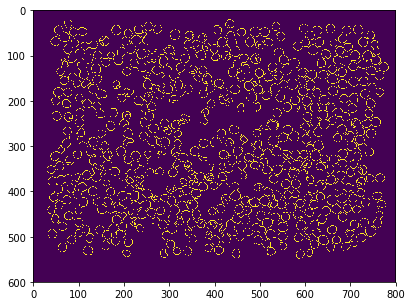

In [150]:
img = Image.fromarray(test_set[1].astype(np.uint8)).convert('L')
img = np.array(img)
plt.imshow(feature.canny(img, sigma=1, low_threshold=20, high_threshold=230))

468


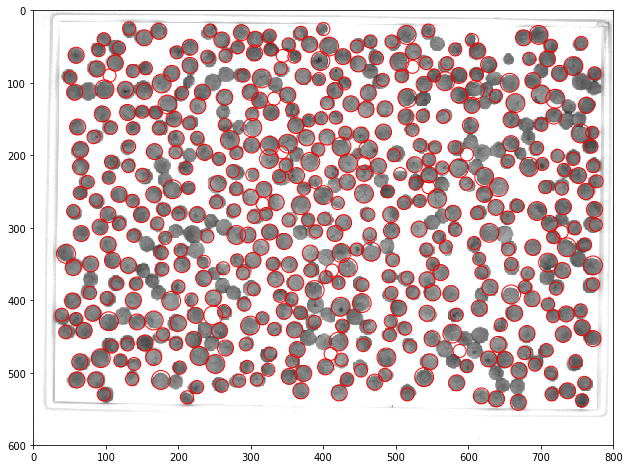

In [147]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

#Hyper parameters
center_th = 10


# Load picture and detect edges
img = Image.open('dataset/train/trainingWrinkledBleachLentilsoriginalImage.bmp').resize((800,600)).convert('L')
# img = Image.open('dataset/test/testsample1originalImage.bmp').resize((800,600)).convert('L')
image = np.array(img)
edges = canny(image, sigma=1, low_threshold=10, high_threshold=200)


# Detect two radii
hough_radii = np.arange(9, 15, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1000)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 8))
image = color.gray2rgb(image)

# cleaning overlapping circles

cents = np.array([cy, cx, radii]).T
cents = cents[cents[:,2].argsort()[::-1]]  # reverse sort based on radii
  

crcls = list()
dist_all = euc(cents[:,:2], cents[:,:2])
for cent_idx, dist in enumerate(dist_all):
    if np.all(dist[cent_idx+1:] > center_th):
        circle = cents[cent_idx]
        crcls.append(circle)
        
print(len(crcls))

for center_y, center_x, radius in crcls:
    try:
        circy, circx = circle_perimeter(center_y, center_x, radius)
        c = plt.Circle((center_x, center_y), radius, color='r', linewidth=1, fill=False)
        ax.add_patch(c)
    except Exception as ex:
        print(ex)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()



# pos = np.array([cx, cy]).T.shape
# pos[cent_idx].tolist() + [radii[cent_idx]]
# (np.pi * ((radii.mean()/2)**2))

309
325
585


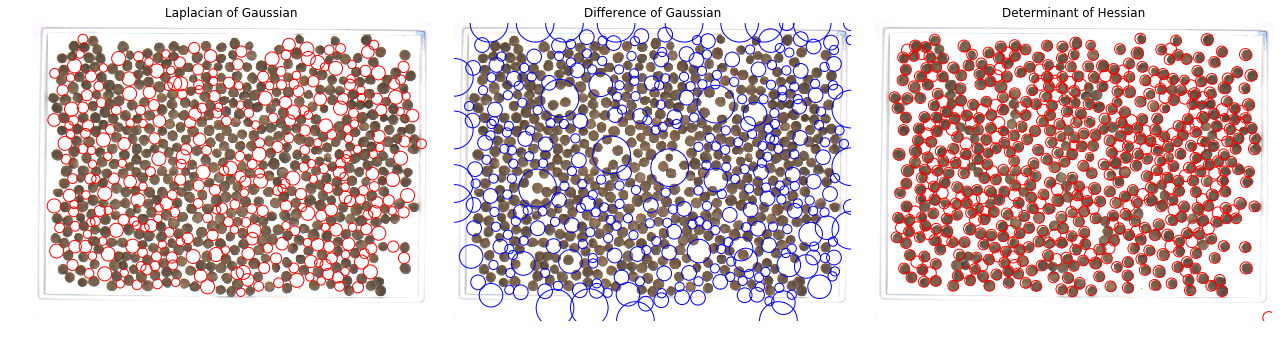

In [148]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


# image = data.hubble_deep_field()[0:500, 0:500]
# image_gray = rgb2gray(image)
image = Image.open('dataset/train/trainingGoodLentilsoriginalImage.bmp').resize((800,600))
# image = Image.open('dataset/test/testsample3originalImage.bmp').resize((800,600))
image_gray = image.convert('L')


blobs_log = blob_log(image_gray, max_sigma=10, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=12, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['red', 'blue', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(18, 9), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    counter = 0
    for blob in blobs:
        y, x, r = blob
        if r< 8:
            continue
        c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
        ax[idx].add_patch(c)
        counter+=1
    print(counter)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

341


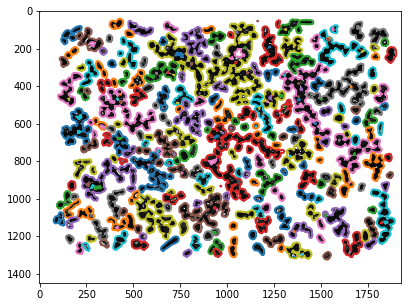

In [149]:
import skimage

# img = Image.fromarray(train_set[1].astype(np.uint8)).convert('L')
# img = np.array(img) 
# img = np.ma.masked_where(img, img > 0.5)
# img = Image.open('dataset/train/trainingWrinkledBleachLentilsoriginalImage_1.bmp').filter(ImageFilter.SHARPEN)
img = Image.open('dataset/train/trainingFungusoriginalImage_1.bmp').filter(ImageFilter.SHARPEN)

img = img.convert('L')
img = np.array(img)
# img[img <100] = 255
# img[img > 230] = 255
img = g(img, sigma=1)
# img[img > 150] = 0

# th = threshold_yen(img)
# th = skimage.filters.threshold_niblack(img)

# x =   cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# print(x[0].min())

x = measure.find_contours(img, 250)
print(len(x))

fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(x):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    


# plt.imshow(img > 0.9, cmap='jet')
# plt.imshow(x[1])

([array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   0., 600.]),
  array([  0.,   0.,   0.,   4., 596.]),
  array([  0.,  

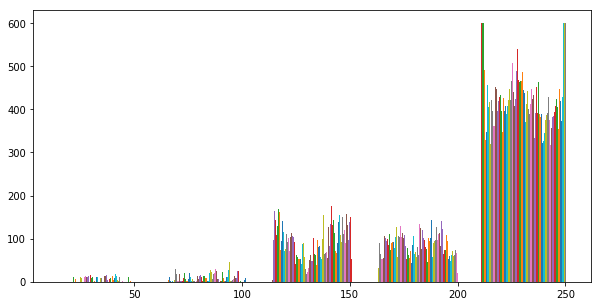

In [151]:
total = list()
for item in test_set:
        item = Image.fromarray(item.astype(np.uint8)).convert('L')
        item = np.array(item) 
        total.append(item.flatten())
# img = Image.fromarray(test_set[4].astype(np.uint8)).convert('L')
# img = np.array(img) 

total = np.array(total).flatten()
# plt.imshow(img)
plt.hist(item, bins=5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/template.py:180: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return response[slices]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


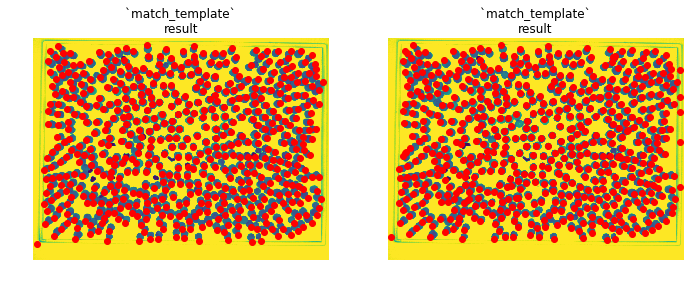

In [178]:

image = train_set_g[0]

# image = data.coins()
image_copper = Image.open('dataset/train/trainingCopperLentilsoriginalImage_1.bmp').convert('L')
image_copper = image_copper.resize((800, 600))
image_copper = np.array(image_copper)
copper_template = image_copper[320:344,227:250]


image_good = Image.open('dataset/train/trainingGoodLentilsoriginalImage_1.bmp').convert('L')
image_good = image_good.resize((800, 600))
image_good = np.array(image_good)
good_template = image_good[305:325,235:255]


templates = [copper_template, good_template]
image = Image.open('dataset/test/testsample2originalImage.bmp').convert('L').resize((800, 600))
image = np.array(image)


fig = plt.figure(figsize=(18, 9))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)

axs = [ax1, ax2]
# ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

# ax1.imshow(copper_template, cmap=plt.cm.gray)
# ax1.set_axis_off()
# ax1.set_title('template')

ax1.imshow(image)
ax1.set_axis_off()
ax1.set_title('`match_template`\nresult')

ax2.imshow(image)
ax2.set_axis_off()
ax2.set_title('`match_template`\nresult')
# highlight matched region
# ax3.autoscale(False)

for idx, tmp in enumerate(templates):
    result = match_template(image, tmp)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]
    neighborhood_size = 20
    threshold = 0.7

    # data = result
    data  = skimage.transform.resize(result, (600, 800))
    data = (data - data.min()) / (data.max() - data.min())

    # print(data.shape)
    data_max = filters.maximum_filter(data, neighborhood_size)
    maxima = (data == data_max)
    data_min = filters.minimum_filter(data, neighborhood_size)
    diff = ((data_max - data_min) > threshold)
    maxima[diff == 0] = 0

    neighborhood = generate_binary_structure(2,2)

    background = (data==0)
    #a little technicality: we must erode the background in order to 
    #successfully subtract it form local_max, otherwise a line will 
    #appear along the background border (artifact of the local maximum filter)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    #we obtain the final mask, containing only peaks, 
    #by removing the background from the local_max mask (xor operation)


    detected_peaks = ((data * 255).astype(np.int32)) ^ eroded_background 

    labeled, num_objects = ndimage.label(detected_peaks > 180)
    slices = ndimage.find_objects(labeled)
    x, y = [], []
    for dy,dx in slices:
        x_center = (dx.start + dx.stop - 1)/2
        x.append(x_center)
        y_center = (dy.start + dy.stop - 1)/2    
        y.append(y_center)

#     axs[idx].imshow(image, cmap='gray')
    axs[idx].plot(x, y, 'ro')

plt.show()

# ax2.imshow(result, cmap=plt.cm.gray)
# ax2.set_axis_off()
# ax2.set_title('image')
# # highlight matched region
# hcoin, wcoin = coin.shape
# rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
# ax2.add_patch(rect)


# ax3.imshow(result)
# ax3.set_axis_off()
# ax3.set_title('`match_template`\nresult')
# # highlight matched region
# ax3.autoscale(False)
# ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)


# from skimage.feature import blob_dog, blob_log, blob_doh
# # q = blob_doh(data_max > threshold, max_sigma=12, threshold=.01)
# ax2.imshow(data_max > threshold)
# # ax2.imshow(q)

# labeled, num_objects = ndimage.label(maxima)
# slices = ndimage.find_objects(labeled)
# x, y = [], []
# for dy,dx in slices:
#     x_center = (dx.start + dx.stop - 1)/2
#     x.append(x_center)
#     y_center = (dy.start + dy.stop - 1)/2    
#     y.append(y_center)

# from skimage.feature import peak_local_max
# u = peak_local_max(result, min_distance=16, exclude_border=False)
# y, x= u[:,0], u[:,1]

# y , x , r = q[:,0], q[:,1], q[:,2]
    
# ax3.imshow(image.resize(result.shape[::-1]))

# ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=5)
# ax3.imshow(result > threshold, alpha = 0.5)
    



In [153]:
index = 0

## normalization
# means = train_set.mean(axis=0)
# train_set = (train_set - means) 
# train_set /= 255.
# test_set = (test_set - means) 
# test_set /= 255.

model = KMeans(n_clusters=5, init='random').fit(train_set.reshape(-1,3))

1499.6409090909092
19.831818181818182
149.5
424.21363636363634
88.63181818181818


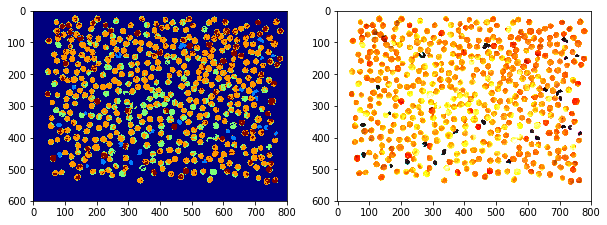

In [154]:

q = model.predict(test_set[index].reshape(-1,3))

plt.subplot(1, 2, 1)
plt.imshow( q.reshape(h,w)/5, cmap='jet')
plt.subplot(1, 2, 2)
plt.imshow(test_set[index]/255)
# print((q ==0).sum() / 220) #background
print((q ==1).sum() / 220)
print((q ==2).sum() / 220)
print((q ==3).sum() / 220)
print((q ==4).sum() / 220)

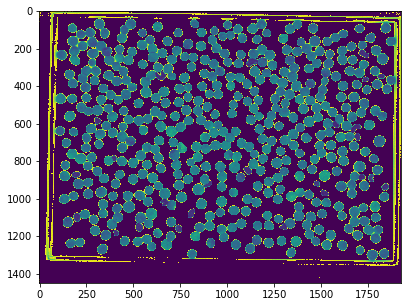

In [233]:
img = Image.open('dataset/test/testsample1originalImage.bmp').convert('L')
img = np.array(img)
img[img > 248] = 0
x =   cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(img)
counter = 0
# for item in x[1]:
#     print(cv2.contourArea(item))



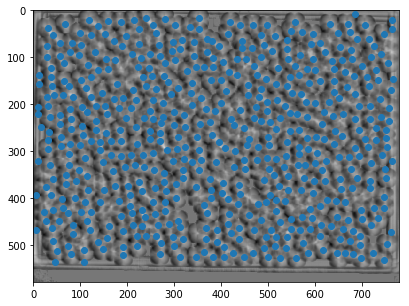

In [ ]:
q = blob_doh(data_max > threshold, max_sigma=12, threshold=.01)

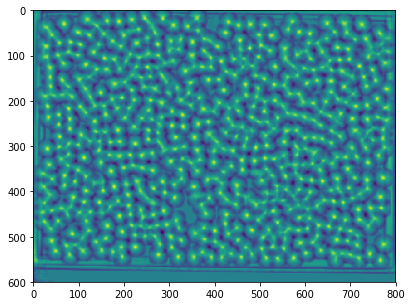

In [36]:
plt.imshow(t)

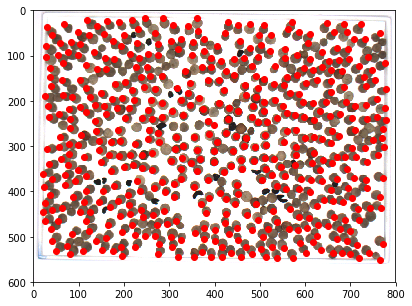